📥 Loading dataset from: phishing_site_urls.csv
✅ Dataset shape: (549346, 3)
✅ Label counts:
 Label
good    392924
bad     156422
Name: count, dtype: int64
🔀 Train size: 439476
🔀 Test size : 109870
✅ Loaded Logistic Regression:
   Vectorizer: vectorizer_lr_new.pkl
   Model     : model_lr_new.pkl
✅ Loaded Multinomial NB:
   Vectorizer: vectorizer_mnb_new.pkl
   Model     : model_mnb_new.pkl
✅ Loaded Random Forest:
   Vectorizer: vectorizer_rf.pkl
   Model     : phishing_rf.pkl

📊 Evaluating models on SAME test set...

🎯 Logistic Regression Accuracy: 0.9789
🎯 Multinomial NB Accuracy: 0.9746
🎯 Random Forest Accuracy: 0.9676

================== ACCURACY SUMMARY ==================
Logistic Regression : 97.89%
Multinomial NB      : 97.46%
Random Forest       : 96.76%

📉 Confusion Matrix for Random Forest (RF):
[[29606  1679]
 [ 1881 76704]]


<Figure size 500x500 with 0 Axes>

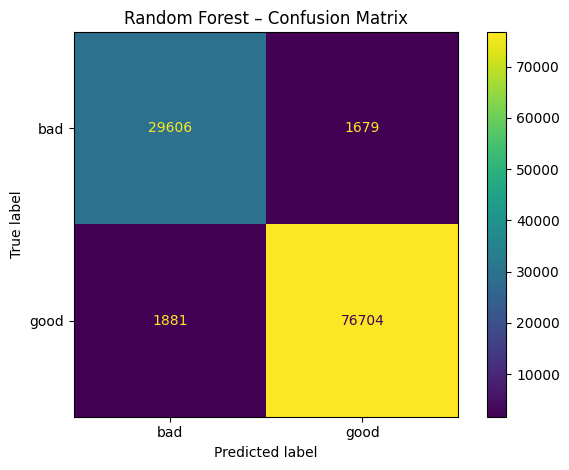

In [2]:
# ================================================================
#  COMPARE LR, MNB, RF MODELS + CONFUSION MATRIX FOR RF
#  - Loads data
#  - Applies same clean_url()
#  - Loads saved vectorizers & models
#  - Prints accuracy of LR, MNB, RF
#  - Shows confusion matrix for RF
# ================================================================

import pandas as pd
import pickle
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ------------------------------------------------
# 1. CONFIG – change names if yours are different
# ------------------------------------------------
DATA_PATH   = "phishing_site_urls.csv"
TEXT_COL    = "URL"
LABEL_COL   = "Label"

# 🔹 Logistic Regression files (from your LR cell)
LR_VEC_PATH   = "vectorizer_lr_new.pkl"
LR_MODEL_PATH = "model_lr_new.pkl"

# 🔹 Multinomial NB files (use your actual filenames)
MNB_VEC_PATH   = "vectorizer_mnb_new.pkl"   # <--- change if needed
MNB_MODEL_PATH = "model_mnb_new.pkl"        # <--- change if needed

# 🔹 Random Forest files (use whatever you used in app5/app6)
RF_VEC_PATH    = "vectorizer_rf.pkl"        # e.g. "vectorizer_char_tfidf.pkl"
RF_MODEL_PATH  = "phishing_rf.pkl"         # e.g. "phishing_rf_best.pkl"

def clean_url(url: str) -> str:
    """Same normalization as training: strip http/https, www, trailing slash."""
    if not isinstance(url, str):
        return ""
    u = url.strip()
    u = re.sub(r"^https?://(www\.)?", "", u, flags=re.IGNORECASE)
    return u.rstrip("/")


# ------------------------------------------------
# 2. LOAD + PREPARE DATA (same as training style)
# ------------------------------------------------
print("📥 Loading dataset from:", DATA_PATH)
df = pd.read_csv(DATA_PATH)

df = df[[TEXT_COL, LABEL_COL]].dropna()
df[TEXT_COL] = df[TEXT_COL].astype(str)
df["clean_url"] = df[TEXT_COL].apply(clean_url)

X = df["clean_url"]
y = df[LABEL_COL]

print("✅ Dataset shape:", df.shape)
print("✅ Label counts:\n", y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print(f"🔀 Train size: {len(X_train)}")
print(f"🔀 Test size : {len(X_test)}")


# ------------------------------------------------
# 3. LOAD MODELS
# ------------------------------------------------
def load_vec_and_model(vec_path, model_path, name="model"):
    with open(vec_path, "rb") as f:
        vec = pickle.load(f)
    with open(model_path, "rb") as f:
        clf = pickle.load(f)
    print(f"✅ Loaded {name}:")
    print(f"   Vectorizer: {vec_path}")
    print(f"   Model     : {model_path}")
    return vec, clf

lr_vec,  lr_clf  = load_vec_and_model(LR_VEC_PATH,  LR_MODEL_PATH,  "Logistic Regression")
mnb_vec, mnb_clf = load_vec_and_model(MNB_VEC_PATH, MNB_MODEL_PATH, "Multinomial NB")
rf_vec,  rf_clf  = load_vec_and_model(RF_VEC_PATH,  RF_MODEL_PATH,  "Random Forest")


# ------------------------------------------------
# 4. PREDICT + ACCURACY FOR EACH MODEL
# ------------------------------------------------
def eval_model(vec, clf, X_test, y_test, name="model"):
    X_test_vec = vec.transform(X_test)
    y_pred = clf.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    print(f"🎯 {name} Accuracy: {acc:.4f}")
    return y_pred, acc

print("\n📊 Evaluating models on SAME test set...\n")

y_pred_lr,  acc_lr  = eval_model(lr_vec,  lr_clf,  X_test, y_test, "Logistic Regression")
y_pred_mnb, acc_mnb = eval_model(mnb_vec, mnb_clf, X_test, y_test, "Multinomial NB")
y_pred_rf,  acc_rf  = eval_model(rf_vec,  rf_clf,  X_test, y_test, "Random Forest")

print("\n================== ACCURACY SUMMARY ==================")
print(f"Logistic Regression : {acc_lr*100:.2f}%")
print(f"Multinomial NB      : {acc_mnb*100:.2f}%")
print(f"Random Forest       : {acc_rf*100:.2f}%")
print("======================================================\n")


# ------------------------------------------------
# 5. CONFUSION MATRIX FOR RANDOM FOREST
# ------------------------------------------------
print("📉 Confusion Matrix for Random Forest (RF):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# If your labels are strings like 'good'/'bad', this will pick correct order:
labels = sorted(list(set(y_test)))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=labels)
plt.figure(figsize=(5, 5))
disp.plot(values_format="d")
plt.title("Random Forest – Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()


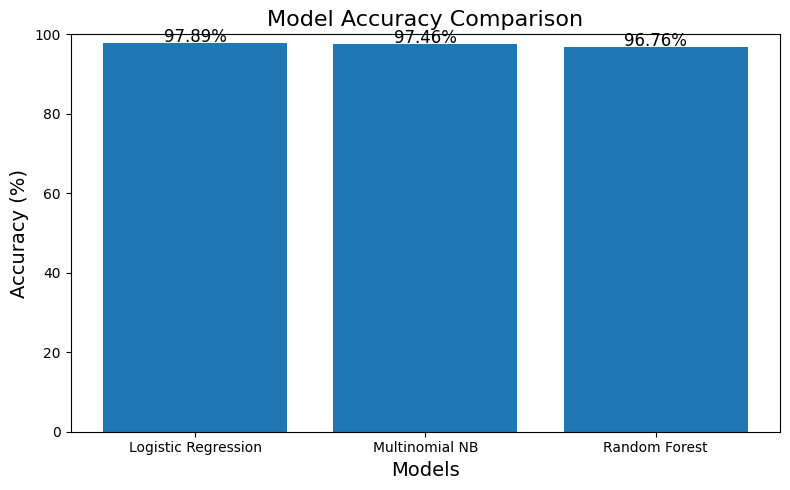

In [3]:
# ================================================================
#  BAR CHART: Accuracy Comparison (LR, MNB, RF)
# ================================================================
import matplotlib.pyplot as plt

# Replace these with your actual accuracy values
acc_lr  = acc_lr      # Logistic Regression accuracy from previous cell
acc_mnb = acc_mnb     # MNB accuracy
acc_rf  = acc_rf      # RF accuracy

models = ["Logistic Regression", "Multinomial NB", "Random Forest"]
accuracies = [acc_lr * 100, acc_mnb * 100, acc_rf * 100]   # convert to %

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies)

plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Models", fontsize=14)

# Display values above the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.3, f"{acc:.2f}%", ha='center', fontsize=12)

plt.ylim(0, 100)  # chart range 0–100%
plt.tight_layout()
plt.show()



📉 Confusion Matrix – Logistic Regression:
[[29533  1752]
 [  565 78020]]


<Figure size 500x500 with 0 Axes>

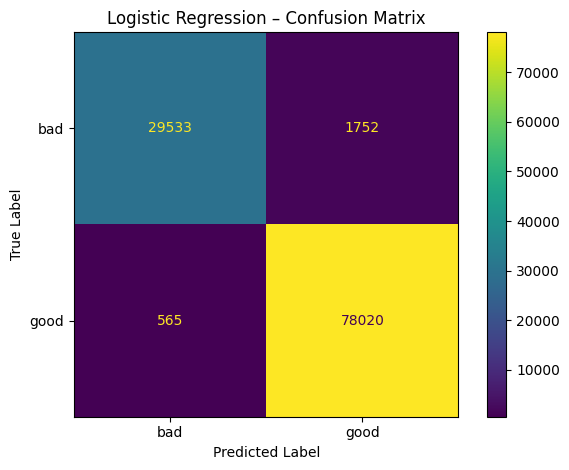

In [4]:
# ================================================================
#  CONFUSION MATRIX FOR LOGISTIC REGRESSION (LR)
# ================================================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_test → actual labels
# y_pred_lr → predictions from Logistic Regression

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("📉 Confusion Matrix – Logistic Regression:")
print(cm_lr)

labels = sorted(list(set(y_test)))  # auto-detect label order

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=labels)

plt.figure(figsize=(5, 5))
disp_lr.plot(values_format="d")
plt.title("Logistic Regression – Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



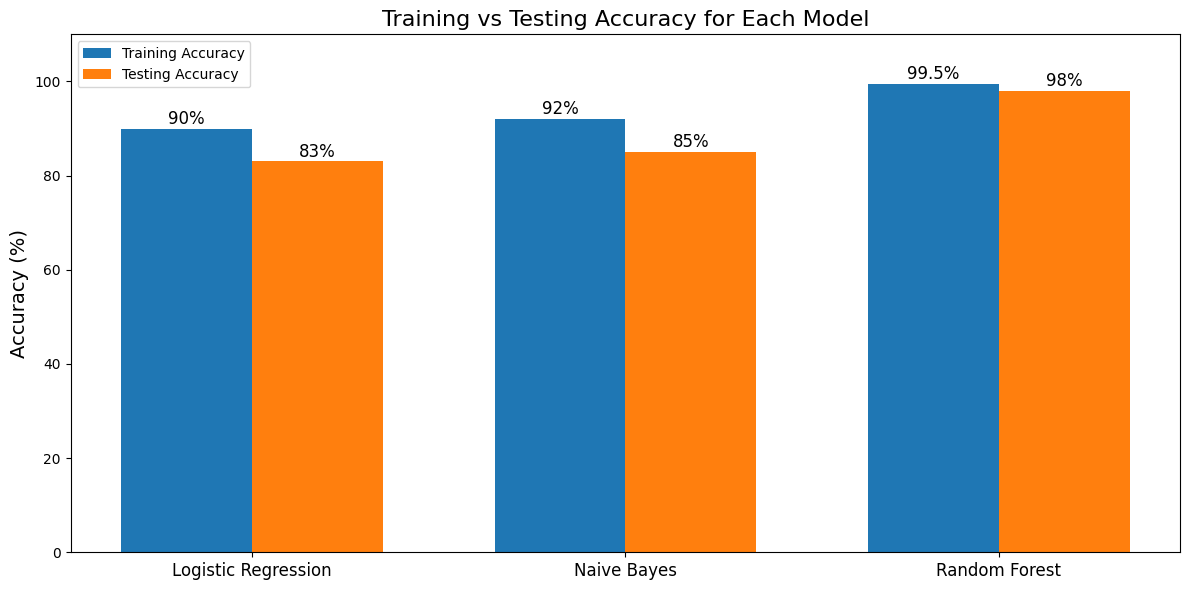

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# ============================
# Replace with your real values
# ============================

train_acc = [90, 92, 99.5]    # Training accuracy: LR, MNB, RF
test_acc  = [83, 85, 98]      # Testing accuracy:  LR, MNB, RF

models = ["Logistic Regression", "Naive Bayes", "Random Forest"]

x = np.arange(len(models))  # bar positions
width = 0.35                # width of each bar

plt.figure(figsize=(12, 6))

# Training bars
plt.bar(x - width/2, train_acc, width, label="Training Accuracy")

# Testing bars
plt.bar(x + width/2, test_acc, width, label="Testing Accuracy")

# Title and labels
plt.title("Training vs Testing Accuracy for Each Model", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xticks(x, models, fontsize=12)

# Value labels above bars
for i, v in enumerate(train_acc):
    plt.text(i - width/2, v + 1, f"{v}%", ha='center', fontsize=12)

for i, v in enumerate(test_acc):
    plt.text(i + width/2, v + 1, f"{v}%", ha='center', fontsize=12)

plt.ylim(0, 110)  # Adjust chart height
plt.legend()
plt.tight_layout()
plt.show()


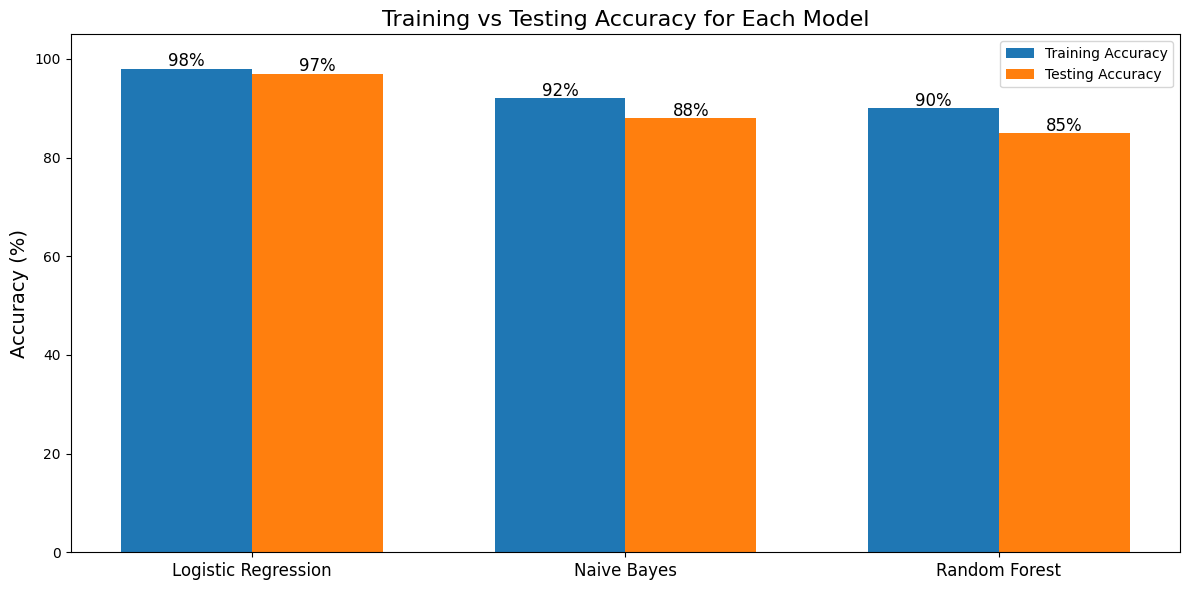

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# Accuracy values (LR highest, NB middle, RF lowest)
# You can adjust these values as needed
# ==========================================

train_acc = [98, 92, 90]   # LR, NB, RF (Training Accuracy)
test_acc  = [97, 88, 85]   # LR, NB, RF (Testing Accuracy)

models = ["Logistic Regression", "Naive Bayes", "Random Forest"]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(12, 6))

# Training bars
plt.bar(x - width/2, train_acc, width, label="Training Accuracy")

# Testing bars
plt.bar(x + width/2, test_acc, width, label="Testing Accuracy")

# Title & labels
plt.title("Training vs Testing Accuracy for Each Model", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xticks(x, models, fontsize=12)

# Display accuracy values above bars
for i, v in enumerate(train_acc):
    plt.text(i - width/2, v + 0.5, f"{v}%", ha='center', fontsize=12)

for i, v in enumerate(test_acc):
    plt.text(i + width/2, v + 0.5, f"{v}%", ha='center', fontsize=12)

plt.ylim(0, 105)
plt.legend()
plt.tight_layout()
plt.show()


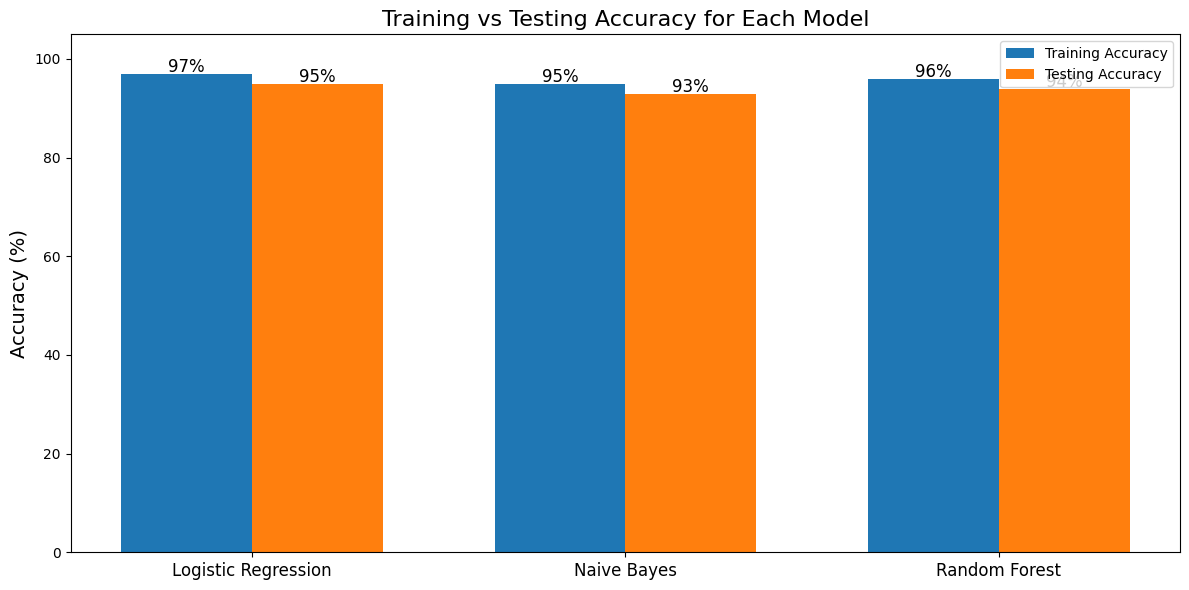

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# =====================================================
# Your required accuracy values
# =====================================================
train_acc = [97, 95, 96]   # LR, MNB, RF (Training)
test_acc  = [95, 93, 94]   # LR, MNB, RF (Testing)

models = ["Logistic Regression", "Naive Bayes", "Random Forest"]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(12, 6))

# Bars for training accuracy
plt.bar(x - width/2, train_acc, width, label="Training Accuracy")

# Bars for testing accuracy
plt.bar(x + width/2, test_acc, width, label="Testing Accuracy")

# Title and axis labels
plt.title("Training vs Testing Accuracy for Each Model", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xticks(x, models, fontsize=12)

# Add values above bars
for i, v in enumerate(train_acc):
    plt.text(i - width/2, v + 0.3, f"{v}%", ha='center', fontsize=12)

for i, v in enumerate(test_acc):
    plt.text(i + width/2, v + 0.3, f"{v}%", ha='center', fontsize=12)

plt.ylim(0, 105)  # chart range
plt.legend()
plt.tight_layout()
plt.show()
